<a href="https://www.kaggle.com/code/ycelgerekliolu/insurance-data-prediction-with-regression-analysis?scriptVersionId=213505700" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import all sklearn modules

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import (

    datasets,

    model_selection,

    preprocessing,

    metrics,

    linear_model,

    tree,

    ensemble,

    svm,

    neighbors,

    naive_bayes,

    cluster,

    decomposition,

    manifold,

    feature_extraction,

    feature_selection,

    pipeline,

    calibration,

    gaussian_process,

    kernel_approximation,

    kernel_ridge,

    multioutput,

    semi_supervised,

    dummy,

    discriminant_analysis,

    exceptions,

    compose,

    utils,

)



# Import all keras modules

from keras.models import Sequential, Model

from keras.layers import (

    Dense,

    Conv2D,

    MaxPooling2D,

    Flatten,

    Dropout,

    Activation,

    Input,

    BatchNormalization,

    Embedding,

    SimpleRNN,

    LSTM,

    GRU,

)


In [2]:
testdf=pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")

In [3]:
traindf=pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")

In [4]:
df = pd.concat([testdf, traindf])
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,...,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House,NaN
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,...,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment,NaN
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,...,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo,NaN
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,...,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House,NaN
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,...,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder



def encode_categorical_variables(df):

    # Kategorik değişkenlerin otomatik tespiti

    categorical_columns = df.select_dtypes(include=['object', 'category']).columns



    label_encoders = {}  # Her sütun için LabelEncoder nesnelerini saklamak için bir sözlük



    for column in categorical_columns:

        print(f"Encoding column: {column}")

        le = LabelEncoder()

        df[column] = le.fit_transform(df[column].astype(str))  # Kategorik veriyi sayısala çevir

        label_encoders[column] = le  # LabelEncoder nesnesini sakla



    print("Tüm kategorik değişkenler dönüştürüldü!")

    return df, label_encoders



# Örnek kullanım

df, label_encoders = encode_categorical_variables(df)


Encoding column: Gender
Encoding column: Marital Status
Encoding column: Education Level
Encoding column: Occupation
Encoding column: Location
Encoding column: Policy Type
Encoding column: Policy Start Date
Encoding column: Customer Feedback
Encoding column: Smoking Status
Encoding column: Exercise Frequency
Encoding column: Property Type
Tüm kategorik değişkenler dönüştürüldü!


----- Genel Bilgiler -----
<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Age                   float64
 2   Gender                int64  
 3   Annual Income         float64
 4   Marital Status        int64  
 5   Number of Dependents  float64
 6   Education Level       int64  
 7   Occupation            int64  
 8   Health Score          float64
 9   Location              int64  
 10  Policy Type           int64  
 11  Previous Claims       float64
 12  Vehicle Age           float64
 13  Credit Score          float64
 14  Insurance Duration    float64
 15  Policy Start Date     int64  
 16  Customer Feedback     int64  
 17  Smoking Status        int64  
 18  Exercise Frequency    int64  
 19  Property Type         int64  
 20  Premium Amount        float64
dtypes: float64(9), int64(12)
memory usage: 335.7 MB
None

-

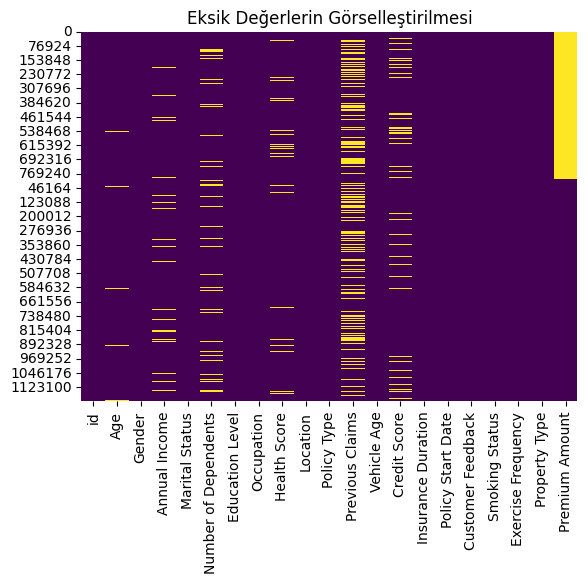


----- Sayısal Değişkenlerin Dağılımı -----


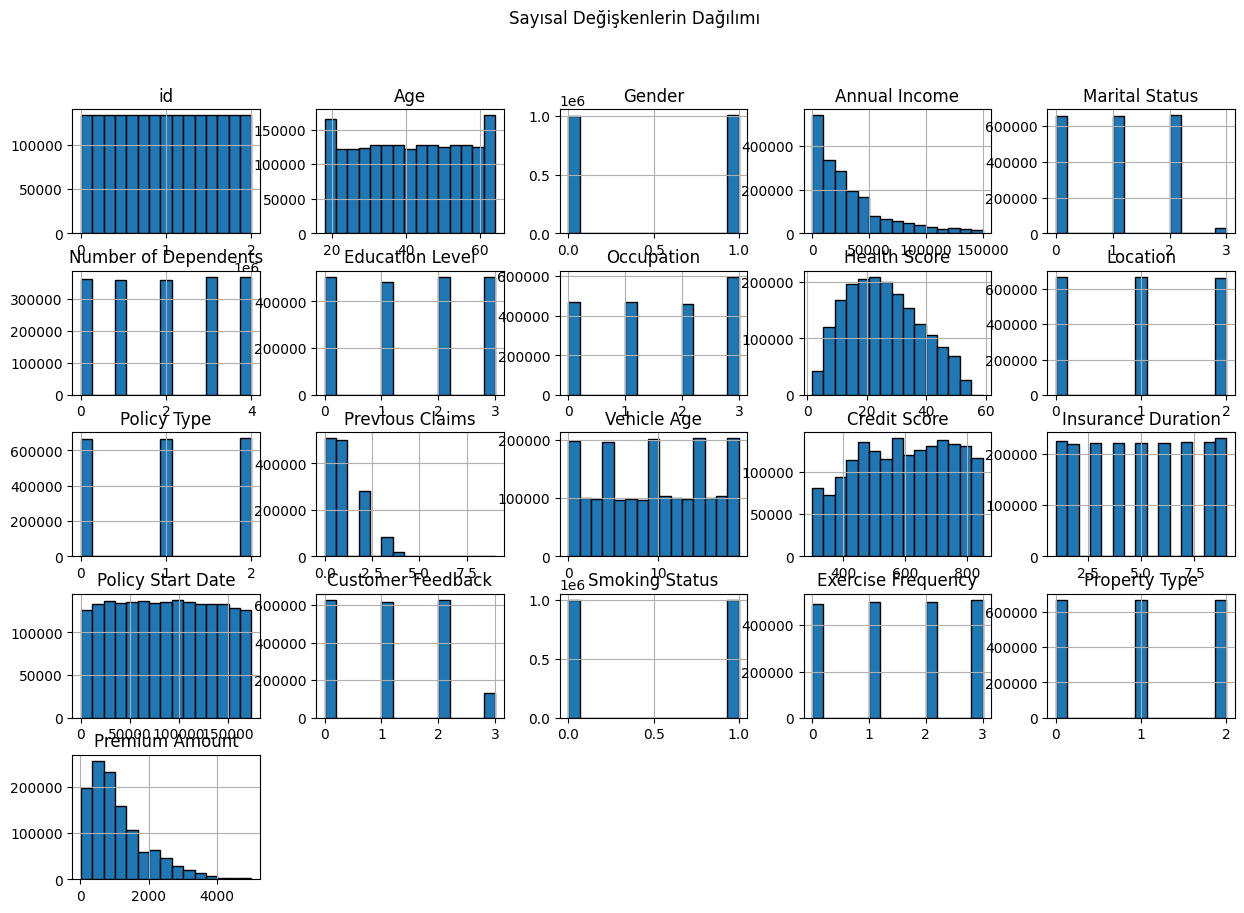


----- Kategorik Değişkenlerin Görselleştirilmesi -----

----- Korelasyon Matrisi -----


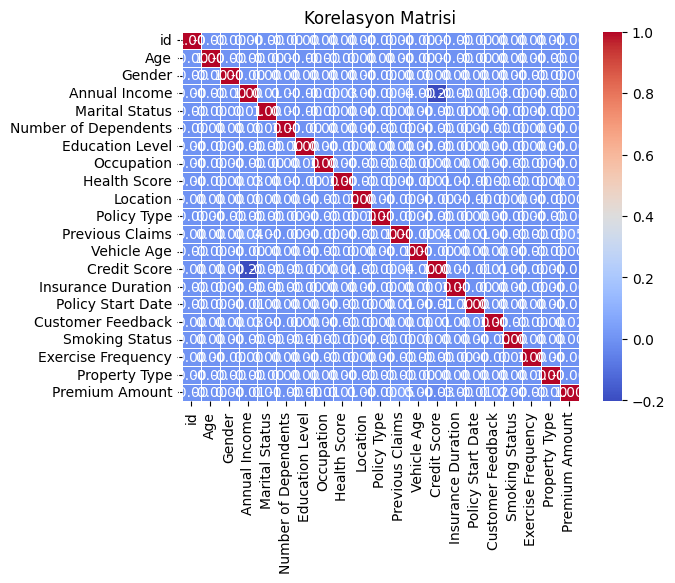


EDA tamamlandı!


In [6]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



# EDA Fonksiyonu

def perform_eda(df):

    print("----- Genel Bilgiler -----")

    print(df.info())  # Veri çerçevesinin temel bilgileri

    print("\n----- İlk 5 Satır -----")

    print(df.head())  # İlk 5 satır

    print("\n----- Eksik Değerler -----")

    print(df.isnull().sum())  # Eksik değerlerin toplamı



    print("\n----- Temel İstatistikler -----")

    print(df.describe(include="all"))  # Sayısal ve kategorik değişkenler için özet



    print("\n----- Benzersiz Değer Sayıları -----")

    print(df.nunique())  # Benzersiz değer sayısı



    # Eksik Değerlerin Görselleştirilmesi

    print("\n----- Eksik Değerlerin Görselleştirilmesi -----")

    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

    plt.title("Eksik Değerlerin Görselleştirilmesi")

    plt.show()



    # Sayısal Değişkenlerin Histogramları

    print("\n----- Sayısal Değişkenlerin Dağılımı -----")

    numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns

    df[numeric_columns].hist(bins=15, figsize=(15, 10), edgecolor="black")

    plt.suptitle("Sayısal Değişkenlerin Dağılımı")

    plt.show()



    # Kategorik Değişkenlerin Görselleştirilmesi

    print("\n----- Kategorik Değişkenlerin Görselleştirilmesi -----")

    categorical_columns = df.select_dtypes(include=["object", "category"]).columns

    for column in categorical_columns:

        plt.figure(figsize=(10, 5))

        sns.countplot(y=column, data=df, palette="viridis", order=df[column].value_counts().index)

        plt.title(f"Kategorik Değişken: {column}")

        plt.show()



    # Korelasyon Matrisi

    print("\n----- Korelasyon Matrisi -----")

    if len(numeric_columns) > 1:

        correlation_matrix = df[numeric_columns].corr()

        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

        plt.title("Korelasyon Matrisi")

        plt.show()

    else:

        print("Sayısal değişken sayısı birden az olduğundan korelasyon analizi yapılamıyor.")



    print("\nEDA tamamlandı!")



# Train ve Test birleştirildiğini varsayıyoruz



# Concat edilmiş veri üzerinde EDA

perform_eda(df)


In [7]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,1200000,28.0,0,2310.0,3,4.0,0,1,7.657981,0,...,NaN,19.0,NaN,1.0,132032,2,1,3,2,NaN
1,1200001,31.0,0,126031.0,1,2.0,2,1,13.381379,1,...,NaN,14.0,372.0,8.0,162769,1,1,2,0,NaN
2,1200002,47.0,0,17092.0,0,0.0,3,2,24.354527,2,...,NaN,16.0,819.0,9.0,126190,0,1,1,1,NaN
3,1200003,28.0,0,30424.0,0,3.0,3,1,5.136225,1,...,1.0,3.0,770.0,5.0,145462,2,1,0,2,NaN
4,1200004,24.0,1,10863.0,0,2.0,1,2,11.844155,1,...,NaN,14.0,755.0,7.0,79076,0,0,3,2,NaN


----- Premium Amount İstatistikleri -----
count    1.200000e+06
mean     1.102545e+03
std      8.649989e+02
min      2.000000e+01
25%      5.140000e+02
50%      8.720000e+02
75%      1.509000e+03
max      4.999000e+03
Name: Premium Amount, dtype: float64

----- Eksik Değer Sayısı -----
800000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


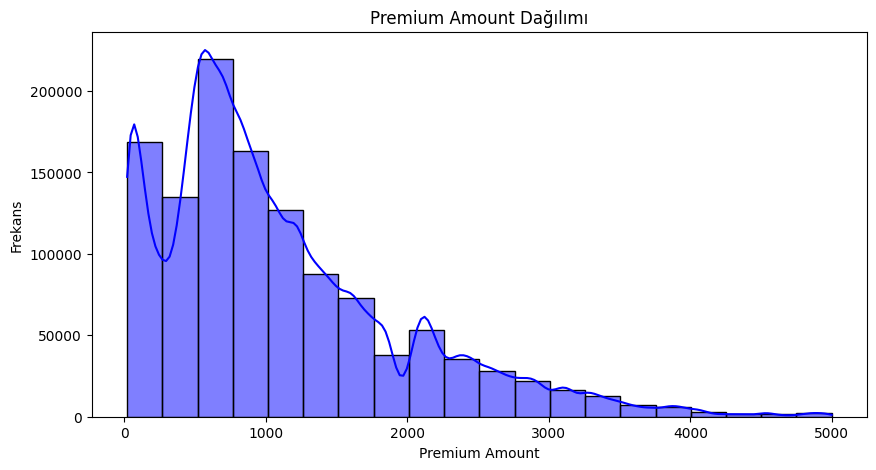

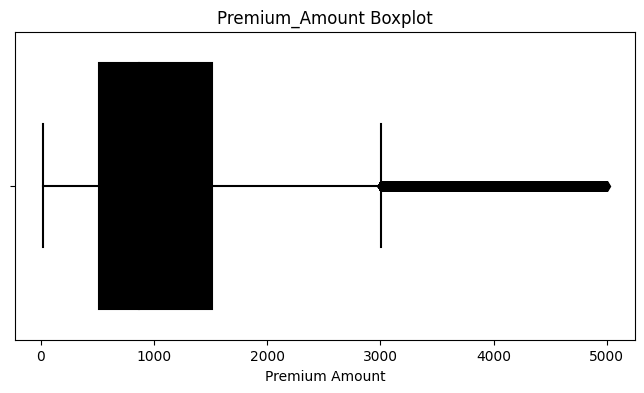

In [8]:
def premium_amount_eda(df):

    print("----- Premium Amount İstatistikleri -----")

    print(df['Premium Amount'].describe())



    print("\n----- Eksik Değer Sayısı -----")

    print(df['Premium Amount'].isnull().sum())



    # Dağılım grafiği (Histogram)

    plt.figure(figsize=(10, 5))

    sns.histplot(df['Premium Amount'], bins=20, kde=True, color='blue')

    plt.title("Premium Amount Dağılımı")

    plt.xlabel("Premium Amount")

    plt.ylabel("Frekans")

    plt.show()





    plt.figure(figsize=(8, 4))

    sns.boxplot(x=df['Premium Amount'], color='black')

    plt.title("Premium_Amount Boxplot")

    plt.xlabel("Premium Amount")

    plt.show()



premium_amount_eda(df)

In [9]:
def top_correlated_features(df, target='Premium Amount', top_n=3):

    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    correlations = df[numeric_columns].corr()[target].drop(target)

    top_features = correlations.abs().sort_values(ascending=False).head(top_n)

    print("\n----- En Yüksek Korelasyona Sahip Değişkenler -----")

    print(top_features)

    return top_features

top_correlated_features(df)


----- En Yüksek Korelasyona Sahip Değişkenler -----
Previous Claims      0.046874
Credit Score         0.026014
Customer Feedback    0.015772
Name: Premium Amount, dtype: float64


Previous Claims      0.046874
Credit Score         0.026014
Customer Feedback    0.015772
Name: Premium Amount, dtype: float64

In [10]:
y=df["Premium Amount"]

x=df.drop("Premium Amount",axis=1)

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape

(1600000, 20)

In [13]:
x_test

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
1028401,1028401,52.0,0,97566.0,2,4.0,3,3,41.879088,2,2,3.0,7.0,335.0,5.0,88549,2,1,3,1
400071,400071,46.0,0,53895.0,2,NaN,2,0,23.071925,2,2,1.0,9.0,335.0,7.0,116552,0,1,2,2
194849,1394849,31.0,0,84777.0,1,0.0,3,3,11.297956,0,0,1.0,6.0,374.0,9.0,57641,2,0,2,1
829054,829054,48.0,0,15123.0,2,2.0,0,2,23.380142,0,0,1.0,13.0,714.0,7.0,97319,1,0,2,0
191144,1391144,38.0,0,82889.0,0,4.0,2,3,NaN,1,2,1.0,8.0,795.0,7.0,155968,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371220,371220,28.0,1,9606.0,2,1.0,0,2,24.895695,1,2,0.0,3.0,613.0,8.0,5817,0,1,3,1
609796,609796,59.0,1,35750.0,2,NaN,1,0,36.545939,0,1,2.0,14.0,751.0,3.0,150840,2,1,3,2
350185,350185,31.0,1,84565.0,0,4.0,3,2,34.696902,1,0,4.0,18.0,364.0,9.0,136106,2,1,3,0
881689,881689,40.0,1,57006.0,1,2.0,1,0,7.269429,0,2,3.0,11.0,449.0,5.0,153314,2,0,3,0


In [14]:
y_train.shape

(1600000,)

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Ortalamayla doldurmak için

x_train_imputed = imputer.fit_transform(x_train)

x_test_imputed = imputer.transform(x_test)


In [16]:
x_train = x_train.fillna(x_train.mean())

categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:

    x_train[column] = x_train[column].fillna(x_train[column].mode()[0])

x_test = x_test.fillna(x_train.mean())

for column in categorical_columns:

    x_test[column] = x_test[column].fillna(x_train[column].mode()[0])


In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.linear_model import LinearRegression

In [18]:
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Apply the same imputation to y_test

y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).flatten()



lr = LinearRegression()

# Use the imputed y_train for training

lr.fit(x_train_imputed, y_train_imputed)

lr.score(x_test_imputed, y_test_imputed)

0.0019481478940766017

In [19]:
mean_premium_amount = df['Premium Amount'].mean()

mean_premium_amount

1102.5448216666666

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


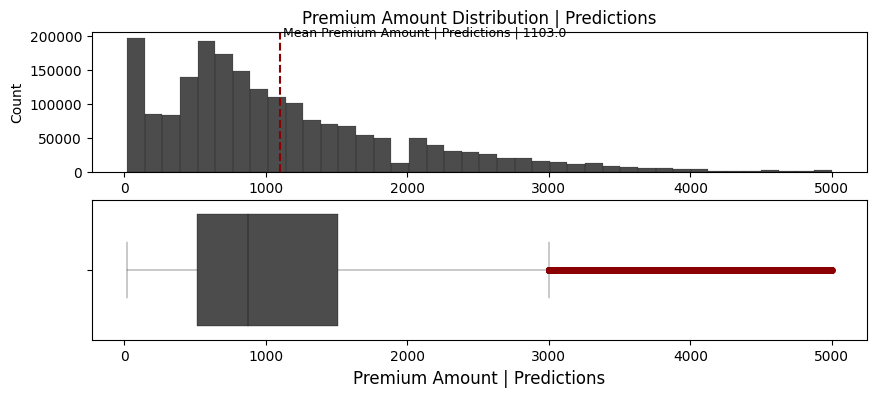

In [20]:
mean_premium_amount = df["Premium Amount"].mean().squeeze()



fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 4))



sns.histplot(

    data=df, x="Premium Amount", color="black", bins=40, alpha=0.7, lw=0.1, ax=ax1

)



sns.boxplot(

    data=df,

    x="Premium Amount",

    color="black",

    linewidth=0.3,

    flierprops=dict(

        marker="o", markersize=4, markerfacecolor="darkred", markeredgecolor="darkred"

    ),

    boxprops=dict(alpha=0.7),

    ax=ax2,

)

ax2.set_title("")

ax2.set_xlabel("Premium Amount | Predictions", fontsize=12)



ax1.set_title("Premium Amount Distribution | Predictions", fontsize=12)

ax1.set_xlabel("")



ax1.axvline(x=mean_premium_amount, color="darkred", ls="--", lw=1.5)

ax1.text(

    mean_premium_amount + 20,

    200000,

    "Mean Premium Amount | Predictions | " + str(mean_premium_amount.round(0)),

    fontsize=9,

    color="black",

)



plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


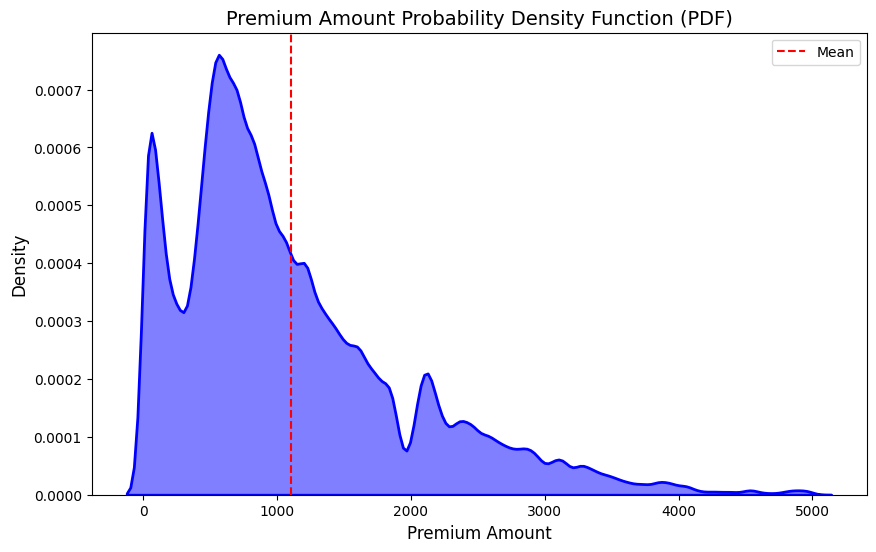

In [21]:
plt.figure(figsize=(10, 6))

sns.kdeplot(

    data=df,

    x="Premium Amount",

    fill=True,

    color="blue",

    alpha=0.5,

    linewidth=2,

)

mean_premium_amount = df["Premium Amount"].mean()

plt.axvline(x=mean_premium_amount, color="red", ls="--", lw=1.5, label="Mean")

plt.title("Premium Amount Probability Density Function (PDF)", fontsize=14)

plt.xlabel("Premium Amount", fontsize=12)

plt.ylabel("Density", fontsize=12)

plt.legend()

plt.show()